# Setup

In [ ]:
# imports
import pandas as pd, seaborn as sns, matplotlib.pyplot as plt

In [7]:
# get segmented df from other notebook
%store -r rfm_segments_df
rfm_df = rfm_segments_df.copy()
display(rfm_df.head())

,recency,frequency,monetary,segment
customer_id,,,,
1,183,3,118711.78,0
2,213,2,100306.58,1
3,188,4,119028.73,0
4,441,3,142874.25,0
5,132,4,120783.07,0


# Describe Segments

### RFM Distributions

In [88]:
# overall
print('OVERALL'.center(53, '-'))
rfm_df.describe()

-----------------------OVERALL-----------------------


,recency,frequency,monetary,segment
count,92.000000,92.000000,92.000000,92.000000
mean,189.054348,3.152174,102632.819130,0.456522
std,122.804353,2.626721,100766.634779,0.542948
min,0.000000,1.000000,9129.350000,0.000000
25%,101.750000,2.000000,66129.007500,0.000000
50%,181.000000,3.000000,85360.000000,0.000000
75%,243.250000,3.000000,115616.882500,1.000000
max,494.000000,23.000000,795328.220000,2.000000


In [37]:
# summary stats
for num in range(0,3):
    print(f'Segment {num}'.center(53, '-'))
    display(rfm_df[rfm_df.segment == num].describe())

----------------------Segment 0----------------------


,recency,frequency,monetary,segment
count,52.000000,52.000000,52.000000,52.0
mean,125.326923,3.269231,109449.610769,0.0
std,79.520800,0.629827,32837.714715,0.0
min,0.000000,2.000000,52263.900000,0.0
25%,66.250000,3.000000,83449.390000,0.0
50%,130.500000,3.000000,106080.755000,0.0
75%,181.000000,3.250000,123508.627500,0.0
max,441.000000,5.000000,200995.410000,0.0


----------------------Segment 1----------------------


,recency,frequency,monetary,segment
count,38.000000,38.000000,38.000000,38.0
mean,284.394737,2.131579,60734.607105,1.0
std,109.625046,0.474829,24973.588446,0.0
min,98.000000,1.000000,9129.350000,1.0
25%,208.500000,2.000000,39053.052500,1.0
50%,249.000000,2.000000,57525.425000,1.0
75%,377.000000,2.000000,77490.360000,1.0
max,494.000000,4.000000,117713.560000,1.0


----------------------Segment 2----------------------


,recency,frequency,monetary,segment
count,2.000000,2.000000,2.000000,2.0
mean,34.500000,19.500000,721462.265000,2.0
std,28.991378,4.949747,104462.235359,0.0
min,14.000000,16.000000,647596.310000,2.0
25%,24.250000,17.750000,684529.287500,2.0
50%,34.500000,19.500000,721462.265000,2.0
75%,44.750000,21.250000,758395.242500,2.0
max,55.000000,23.000000,795328.220000,2.0


### Boxplots

<Axes: xlabel='segment', ylabel='recency'>

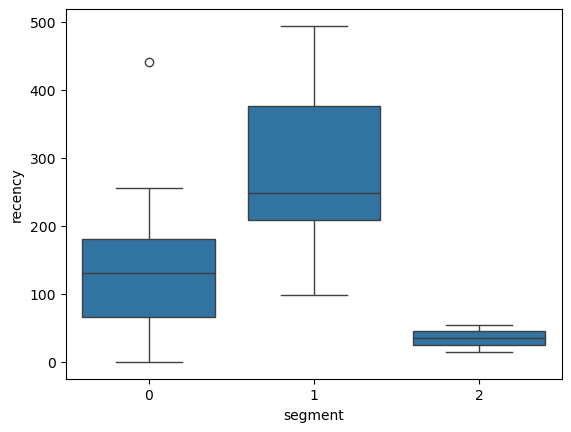

In [24]:
sns.boxplot(x='segment', y='recency', data=rfm_df)

<Axes: xlabel='segment', ylabel='frequency'>

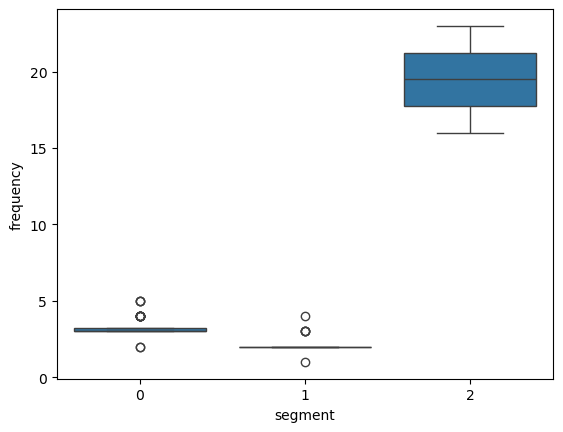

In [25]:
sns.boxplot(x='segment', y='frequency', data=rfm_df)

<Axes: xlabel='segment', ylabel='monetary'>

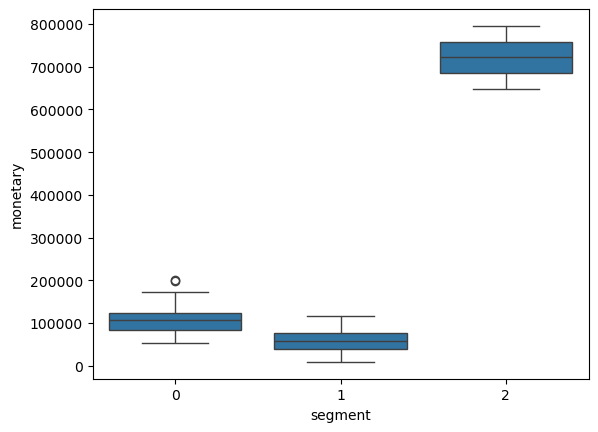

In [26]:
sns.boxplot(x='segment', y='monetary', data=rfm_df)

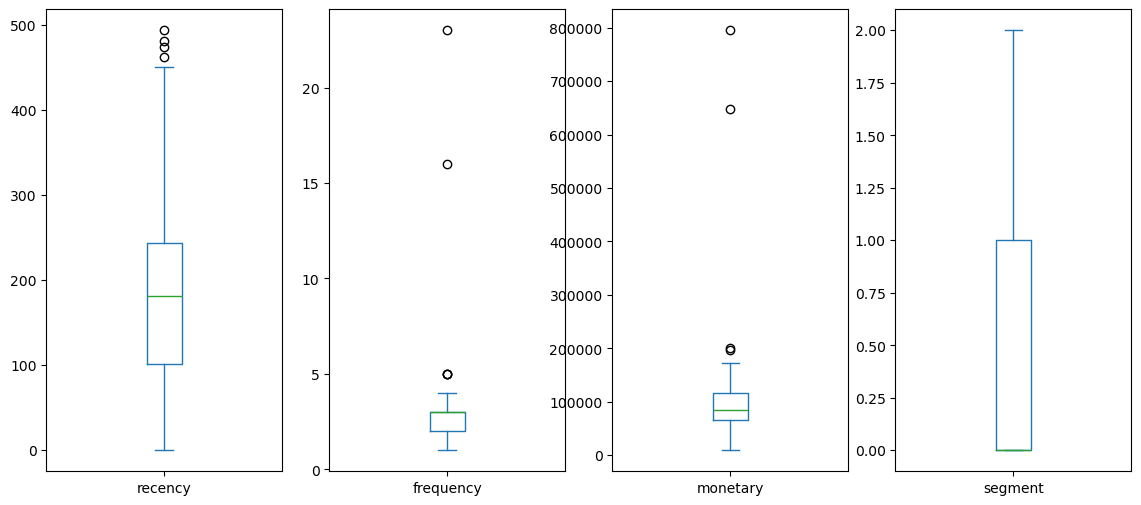

In [39]:
rfm_df.plot(kind='box', subplots=True, figsize=(14,6))
plt.show()

### Pie Charts & Quick Stats

,segment,Recency_mean,Frequency_mean,Monetary_mean,Monetary_total,count
0,2,34.500000,19.500000,721462.265000,1442924.53,2
1,0,125.326923,3.269231,109449.610769,5691379.76,52
2,1,284.394737,2.131579,60734.607105,2307915.07,38


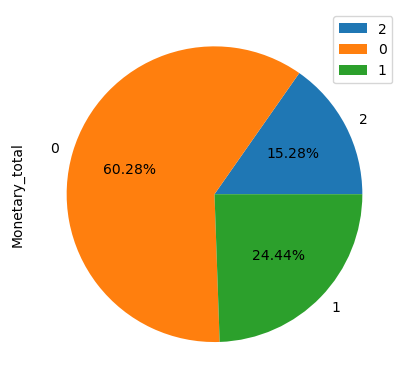

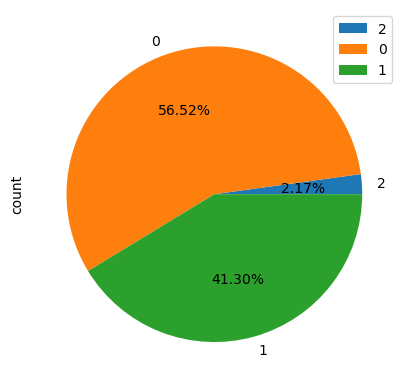

In [ ]:
# build summary table of means and revenue/size totals
rfm_cols = ['recency', 'frequency', 'monetary']

segment_summary_df = (
    rfm_df.groupby('segment').agg(
        Recency_mean        = ('recency', 'mean'),
        Frequency_mean      = ('frequency', 'mean'),
        Monetary_mean       = ('monetary', 'mean'),
        Monetary_total      = ('monetary', 'sum'),
        count               = ('segment', 'count')
    ).sort_values('Monetary_mean', ascending=False).reset_index()
)

# ----displays------------------------------
# summary table
display(segment_summary_df)

# pie chart: segments' revenue proportions 
segment_summary_df.plot.pie(y='Monetary_total', labels=segment_summary_df['segment'], autopct='%1.2f%%')
plt.show()

# pie chart: segments' proportion of customers
segment_summary_df.plot.pie(y='count', labels=segment_summary_df['segment'], autopct='%1.2f%%')
plt.show()